In [19]:
from matplotlib.pyplot import figure
from datetime import date
from os import path

import pprint
import os
import glob
import netCDF4
import random
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns; sns.set()
import numpy as np
import numpy.ma as ma
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

In [20]:
file_name = "GITCO_npp_d20230220_t1721262_e1722504_b58642_c20230220174454361960_oebc_ops.h5"

In [21]:
f = netCDF4.Dataset(file_name)

#for key in f.__dict__.keys(): print(key)

print(f)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    Distributor: oeb-
    Mission_Name: S-NPP/JPSS
    N_Dataset_Source: oeb-
    N_HDF_Creation_Date: 20230220
    N_HDF_Creation_Time: 174454.361960Z
    Platform_Short_Name: NPP
    dimensions(sizes): 
    variables(dimensions): 
    groups: All_Data, Data_Products


In [22]:
for key in f.__dict__.keys(): print(key)

Distributor
Mission_Name
N_Dataset_Source
N_HDF_Creation_Date
N_HDF_Creation_Time
Platform_Short_Name


In [23]:
all_data_gp = f.groups['All_Data']

all_data_gp

<class 'netCDF4._netCDF4.Group'>
group /All_Data:
    dimensions(sizes): 
    variables(dimensions): 
    groups: VIIRS-IMG-GEO-TC_All

In [24]:
VIIRS_IMG_GEO_TC_Al = all_data_gp.groups['VIIRS-IMG-GEO-TC_All']

VIIRS_IMG_GEO_TC_Al

<class 'netCDF4._netCDF4.Group'>
group /All_Data/VIIRS-IMG-GEO-TC_All:
    dimensions(sizes): phony_dim_0(1536), phony_dim_1(6400), phony_dim_2(48), phony_dim_3(1), phony_dim_4(3)
    variables(dimensions): float32 Height(phony_dim_0, phony_dim_1), float32 Latitude(phony_dim_0, phony_dim_1), float32 Longitude(phony_dim_0, phony_dim_1), int64 MidTime(phony_dim_2), uint8 ModeGran(phony_dim_3), uint8 ModeScan(phony_dim_2), int32 NumberOfScans(phony_dim_3), uint8 PadByte1(phony_dim_4), uint8 QF1_SCAN_VIIRSSDRGEO(phony_dim_2), uint8 QF2_SCAN_VIIRSSDRGEO(phony_dim_2), uint8 QF2_VIIRSSDRGEO(phony_dim_0, phony_dim_1), float32 SCAttitude(phony_dim_2, phony_dim_4), float32 SCPosition(phony_dim_2, phony_dim_4), float32 SCSolarAzimuthAngle(phony_dim_2), float32 SCSolarZenithAngle(phony_dim_2), float32 SCVelocity(phony_dim_2, phony_dim_4), float32 SatelliteAzimuthAngle(phony_dim_0, phony_dim_1), float32 SatelliteRange(phony_dim_0, phony_dim_1), float32 SatelliteZenithAngle(phony_dim_0, phony_dim_1)

In [25]:
for key in VIIRS_IMG_GEO_TC_Al.variables.keys():
    print(key)

Height
Latitude
Longitude
MidTime
ModeGran
ModeScan
NumberOfScans
PadByte1
QF1_SCAN_VIIRSSDRGEO
QF2_SCAN_VIIRSSDRGEO
QF2_VIIRSSDRGEO
SCAttitude
SCPosition
SCSolarAzimuthAngle
SCSolarZenithAngle
SCVelocity
SatelliteAzimuthAngle
SatelliteRange
SatelliteZenithAngle
SolarAzimuthAngle
SolarZenithAngle
StartTime


In [26]:
latitude_obj = VIIRS_IMG_GEO_TC_Al.variables['Latitude']

latitude_obj

<class 'netCDF4._netCDF4.Variable'>
float32 Latitude(phony_dim_0, phony_dim_1)
path = /All_Data/VIIRS-IMG-GEO-TC_All
unlimited dimensions: phony_dim_0, phony_dim_1
current shape = (1536, 6400)
filling on, default _FillValue of 9.969209968386869e+36 used

In [27]:
data = ma.getdata(latitude_obj)

data

masked_array(
  data=[[29.304096, 29.303837, 29.303577, ..., 24.675703, 24.673523,
         24.671337],
        [29.31146 , 29.311197, 29.310934, ..., 24.682768, 24.68059 ,
         24.67841 ],
        [29.318823, 29.318556, 29.31829 , ..., 24.689844, 24.687675,
         24.685488],
        ...,
        [34.333504, 34.333294, 34.33309 , ..., 29.476719, 29.474384,
         29.472044],
        [34.340878, 34.340664, 34.340454, ..., 29.483704, 29.48137 ,
         29.479029],
        [34.348248, 34.348034, 34.34782 , ..., 29.49068 , 29.488352,
         29.486015]],
  mask=False,
  fill_value=1e+20,
  dtype=float32)

In [28]:
data.shape

(1536, 6400)

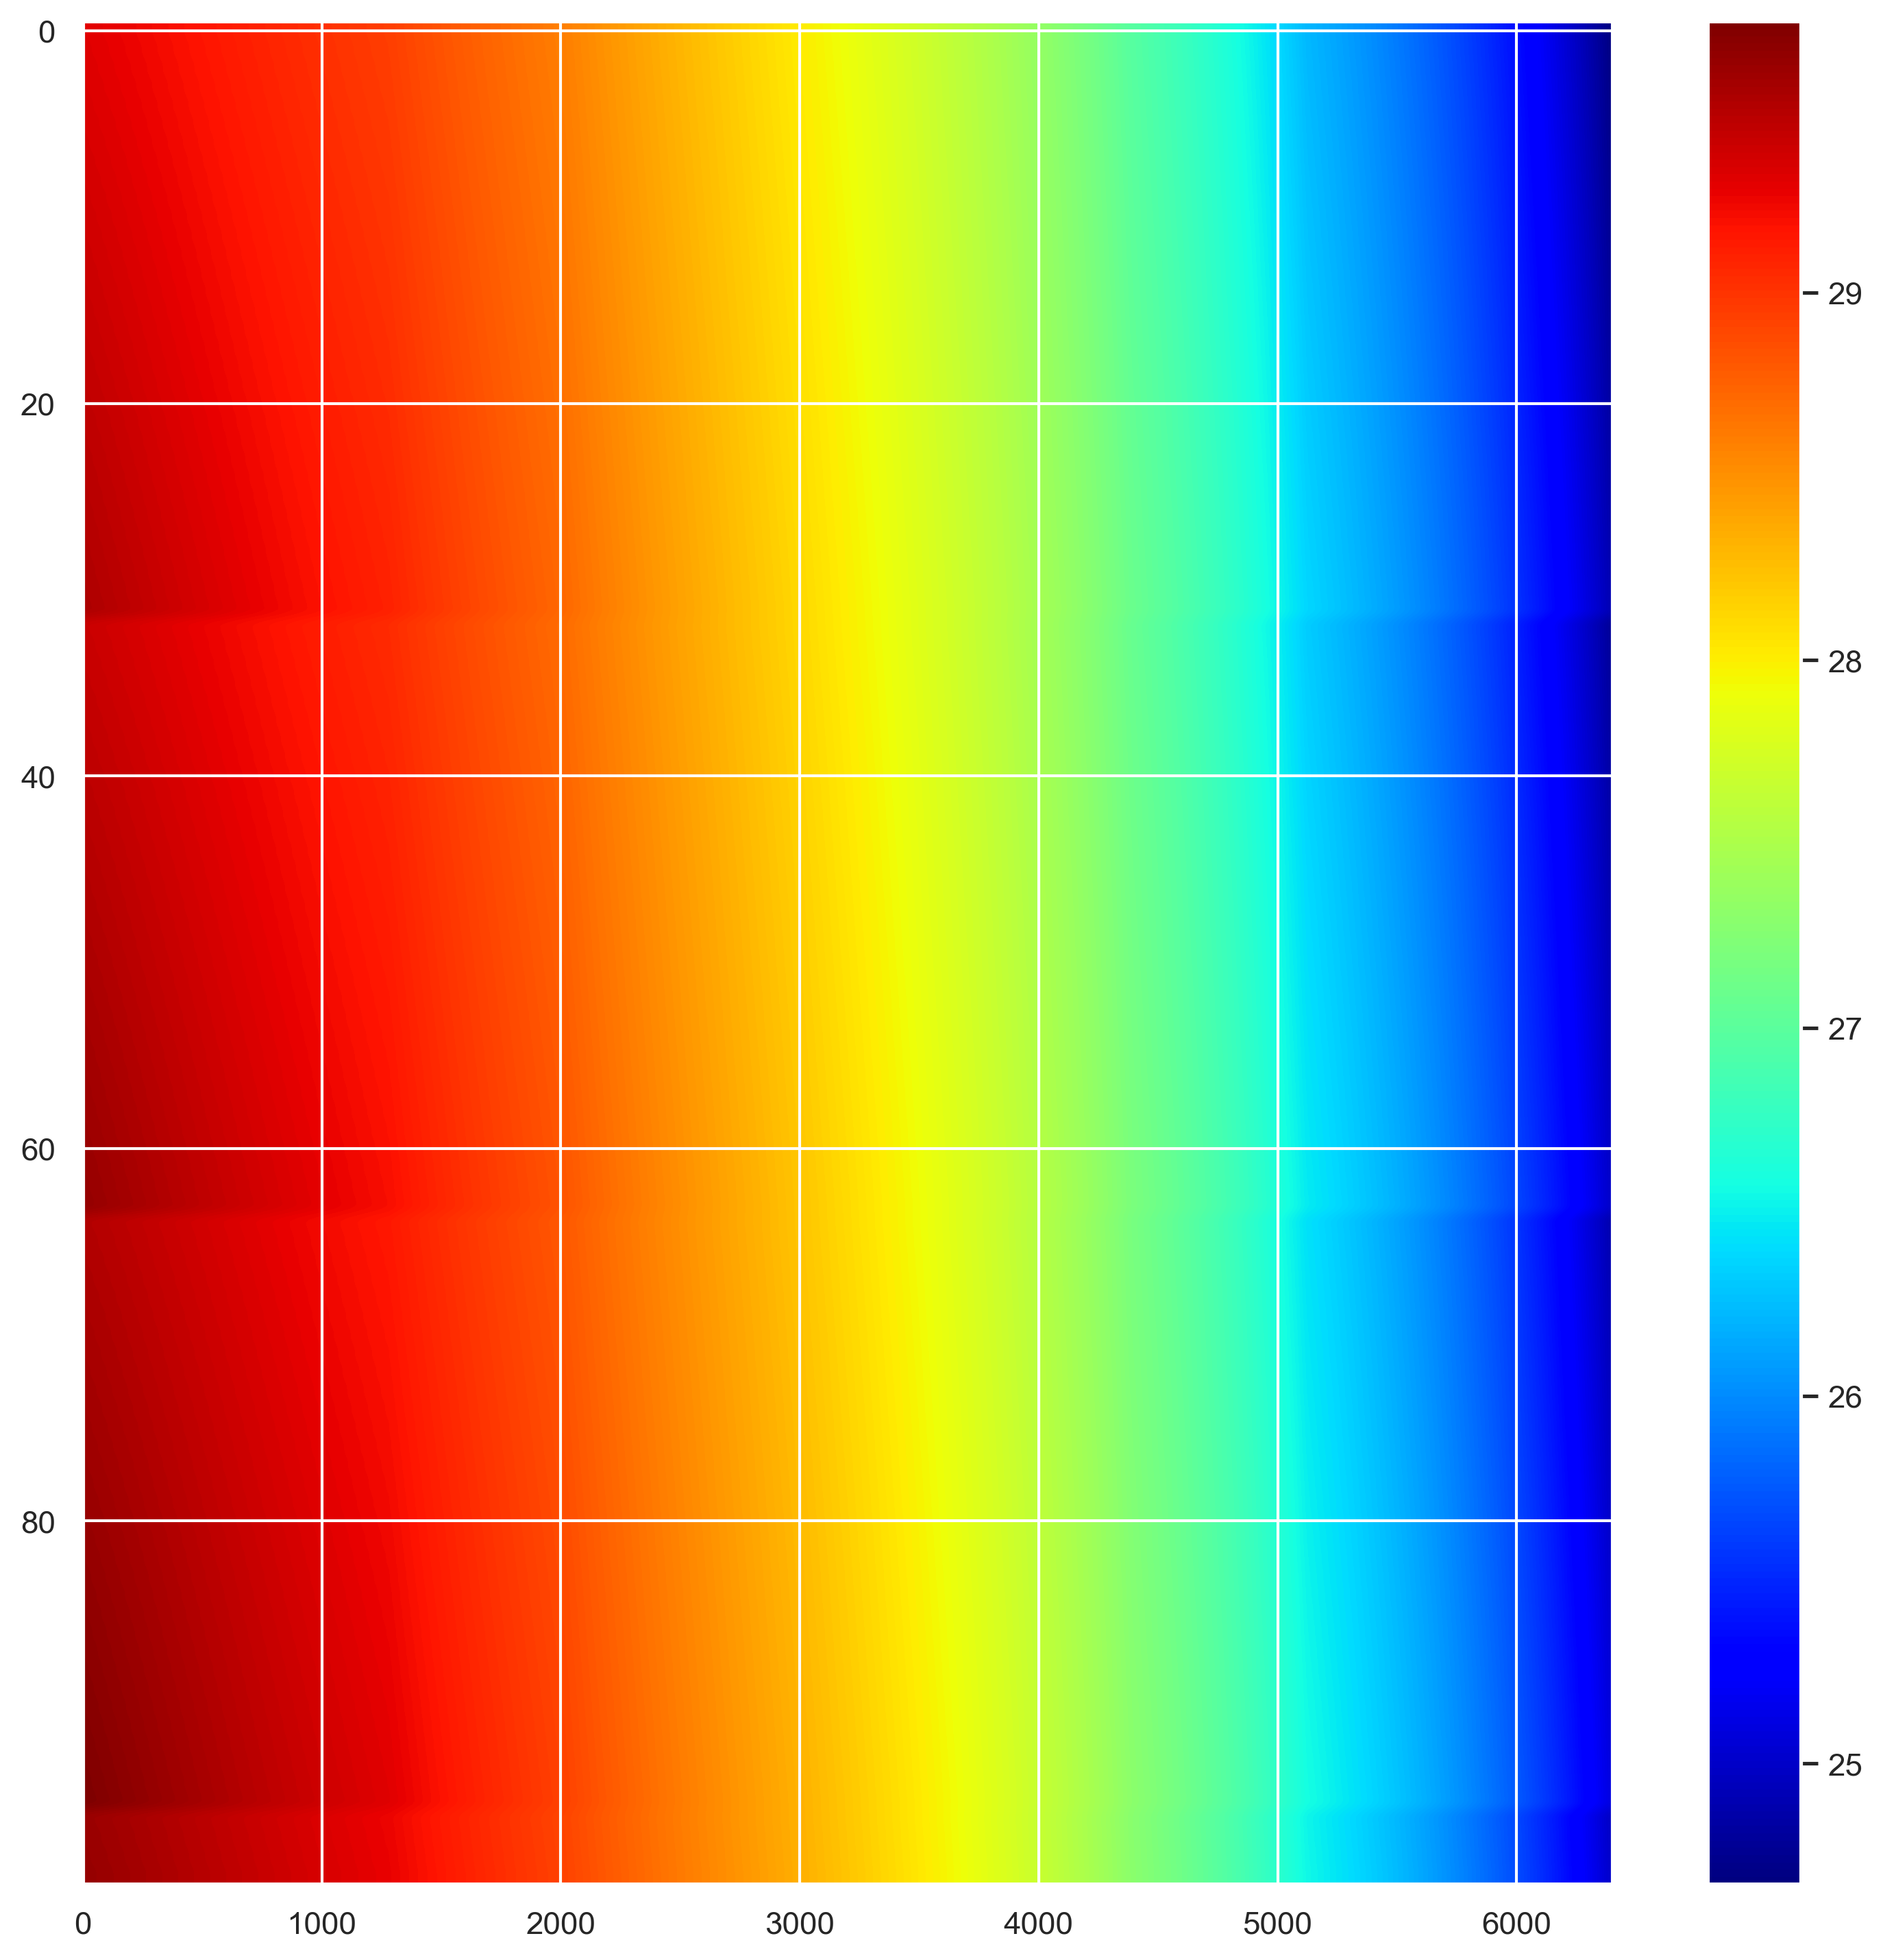

In [37]:
fig = figure(num=None, figsize=(12, 12), dpi=300, facecolor='w', edgecolor='k')

plt.imshow(data[:100,:], aspect='auto',cmap='jet')

plt.colorbar()

plt.show()